In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re

In [2]:
url='https://internshala.com/jobs/data-science-jobs/'

In [3]:
req=requests.get(url)

In [4]:
req

<Response [200]>

In [5]:
content=BeautifulSoup(req.content,'html.parser')
print(content.prettify())

<!DOCTYPE html>
<html lang="en" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="https://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta content="IE=9" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0 user-scalable=0" name="viewport"/>
  <meta content="702141670710132" property="fb:app_id"/>
  <meta content="website" property="og:type"/>
  <meta content="1200" property="og:image:width"/>
  <meta content="630" property="og:image:height"/>
  <meta content="@Internshala" name="twitter:site"/>
  <meta content="summary_large_image" name="twitter:card"/>
  <meta content="@internshala" name="twitter:creator"/>
  <meta content="#ffffff" name="theme-color"/>
  <meta content="#ffffff" name="msapplication-navbutton-color"/>
  <meta content="telephone=no" name="format-detection"/>
  <link as="font" crossorigin="" href="/static/fonts/Inter.woff2?v=3.11" type="font/woff2"/>
  <link as="font" crossorigin="" href="/

In [6]:
jobs=content.find_all('div',{'class':'company'})

In [7]:
print(jobs)

[<div class="company">
<h3 class="heading_4_5 profile">
<a class="view_detail_button" href="/job/detail/data-analyst-operations-fresher-jobs-in-mumbai-at-living-things1688978935">Data Analyst - Operations</a> </h3>
<h4 class="heading_6 company_name">
<a class="link_display_like_text view_detail_button" href="/jobs/fresher-job-at-living-things">
                        Living Things                    </a>
</h4>
</div>, <div class="company">
<h3 class="heading_4_5 profile">
<a class="view_detail_button" href="/job/detail/analyst-business-operations-fresher-jobs-in-mumbai-at-medianet1689346632">Analyst - Business Operations</a> </h3>
<h4 class="heading_6 company_name">
<a class="link_display_like_text view_detail_button" href="/jobs/fresher-job-at-media-net">
                        Media.net                    </a>
</h4>
</div>, <div class="company">
<h3 class="heading_4_5 profile">
<a class="view_detail_button" href="/job/detail/data-science-technical-trainer-fresher-jobs-in-multiple-l

In [8]:
print(len(jobs))

40


In [9]:
job=jobs[0]

In [10]:
job

<div class="company">
<h3 class="heading_4_5 profile">
<a class="view_detail_button" href="/job/detail/data-analyst-operations-fresher-jobs-in-mumbai-at-living-things1688978935">Data Analyst - Operations</a> </h3>
<h4 class="heading_6 company_name">
<a class="link_display_like_text view_detail_button" href="/jobs/fresher-job-at-living-things">
                        Living Things                    </a>
</h4>
</div>

In [11]:
job.text

'\n\nData Analyst - Operations \n\n\n                        Living Things                    \n\n'

In [12]:
name=content.find_all('div',{'class':'company'})
#print(name)
#print(type(name))
#name=name[0]
#name=name.text
len(name)

40

In [13]:
salary=content.find_all('div',{'class':'item_body salary'})
#print(salary)
len(salary)

40

In [14]:
experience=content.find_all('div',{'class':'item_body mobile-text'})
#print(experience)
len(experience)

40

In [15]:
Jobs=[]
Salary=[]
Experience=[]

In [16]:
for i in name:
    Jobs.append(i.text)
    
for i in salary:
    Salary.append(i.text)
    
for i in experience:
    Experience.append(i.text)  

In [17]:
data={'Jobs':Jobs,'Salary':Salary,'Experience':Experience}

In [18]:
df=pd.DataFrame(data)

In [19]:
df.head()

,Jobs,Salary,Experience
0,\n\nData Analyst - Operations \n\n\n ...,\n ₹ 3 LPA ...,0-2 years experience
1,\n\nAnalyst - Business Operations \n\n\n ...,\n ₹ 3 - 4 LPA ...,0-2 years experience
2,\n\nData Science Technical Trainer \n\n\n ...,\n ₹ 2 - 5 LPA ...,0-5 years experience
3,\n\nData Entry Specialist \n\n\n ...,\n ₹ 2 - 3 LPA ...,0-2 years experience
4,\n\nData Scientist \n\n\n ...,\n ₹ 5 - 6 LPA ...,0-5 years experience


In [20]:
Df1=df.applymap(lambda x:x.replace('\n',''))

In [21]:
Df1.head()

,Jobs,Salary,Experience
0,Data Analyst - Operations ...,₹ 3 LPA ...,0-2 years experience
1,Analyst - Business Operations ...,₹ 3 - 4 LPA ...,0-2 years experience
2,Data Science Technical Trainer ...,₹ 2 - 5 LPA ...,0-5 years experience
3,Data Entry Specialist ...,₹ 2 - 3 LPA ...,0-2 years experience
4,Data Scientist InQogni...,₹ 5 - 6 LPA ...,0-5 years experience


In [22]:
ss=r'[₹,-]'

In [23]:
Df2=Df1.applymap(lambda x:re.sub(ss,'',x))

In [24]:
Df2.head()

,Jobs,Salary,Experience
0,Data Analyst Operations ...,3 LPA ...,02 years experience
1,Analyst Business Operations ...,3 4 LPA ...,02 years experience
2,Data Science Technical Trainer ...,2 5 LPA ...,05 years experience
3,Data Entry Specialist ...,2 3 LPA ...,02 years experience
4,Data Scientist InQogni...,5 6 LPA ...,05 years experience


In [25]:
Df2['Experience']=Df2['Experience'].str.replace('years experience','')
Df2['Salary']=Df2['Salary'].str.replace('LPA ...','')

C:\Users\Md Moghish Uddin\AppData\Local\Temp\ipykernel_11936\122342500.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  Df2['Salary']=Df2['Salary'].str.replace('LPA ...','')


In [26]:
pattern = r'(\d+(?:\.\d+)?)'

In [27]:
Df2[['Min_Salary', 'Max_Salary']] = Df2['Salary'].str.extractall(pattern).unstack()

In [28]:
Df2.head()

,Jobs,Salary,Experience,Min_Salary,Max_Salary
0,Data Analyst Operations ...,3 ...,02,3,NaN
1,Analyst Business Operations ...,3 4 ...,02,3,4
2,Data Science Technical Trainer ...,2 5 ...,05,2,5
3,Data Entry Specialist ...,2 3 ...,02,2,3
4,Data Scientist InQogni...,5 6 ...,05,5,6


In [29]:
Df2.isnull().sum()

Jobs          0
Salary        0
Experience    0
Min_Salary    0
Max_Salary    7
dtype: int64

In [30]:
Df2['Max_Salary']=Df2['Max_Salary'].bfill()

In [31]:
Df2['Salary']=Df2['Salary'].str.replace(',', '').str.split().apply(lambda x:[float(i) for i in x])

In [32]:
Df2['Avg_Salary']=Df2['Salary'].apply(lambda x:sum(x)/len(x))

In [33]:
Df2=Df2.drop('Salary',axis=1)

In [34]:
Df2.head()

,Jobs,Experience,Min_Salary,Max_Salary,Avg_Salary
0,Data Analyst Operations ...,02,3,4,3.0
1,Analyst Business Operations ...,02,3,4,3.5
2,Data Science Technical Trainer ...,05,2,5,3.5
3,Data Entry Specialist ...,02,2,3,2.5
4,Data Scientist InQogni...,05,5,6,5.5


In [35]:
Df2['Min_Salary']=Df2['Min_Salary'].str.replace(',', '').str.split().apply(lambda x:[float(i) for i in x])

In [36]:
Df2['Min_Salary']=Df2['Min_Salary'].apply(lambda x:sum(x)/len(x))

In [37]:
Df2.head()

,Jobs,Experience,Min_Salary,Max_Salary,Avg_Salary
0,Data Analyst Operations ...,02,3.0,4,3.0
1,Analyst Business Operations ...,02,3.0,4,3.5
2,Data Science Technical Trainer ...,05,2.0,5,3.5
3,Data Entry Specialist ...,02,2.0,3,2.5
4,Data Scientist InQogni...,05,5.0,6,5.5


In [38]:
Df2['Max_Salary']=Df2['Max_Salary'].str.replace(',', '').str.split().apply(lambda x:[float(i) for i in x])

In [39]:
Df2['Max_Salary']=Df2['Max_Salary'].apply(lambda x:sum(x)/len(x))

In [40]:
Df2

,Jobs,Experience,Min_Salary,Max_Salary,Avg_Salary
0,Data Analyst Operations ...,02,3.0,4.0,3.00
1,Analyst Business Operations ...,02,3.0,4.0,3.50
2,Data Science Technical Trainer ...,05,2.0,5.0,3.50
3,Data Entry Specialist ...,02,2.0,3.0,2.50
4,Data Scientist InQogni...,05,5.0,6.0,5.50
5,Associate Business Analyst ...,02,3.6,4.8,4.20
6,Data Analyst Simplisat...,05,10.0,15.0,12.50
7,Senior Python AI/ML Engineer ...,05,3.6,5.4,4.50
8,Technical Trainer EdSl...,05,5.0,8.0,6.50
9,Business Analyst Trainee ...,02,3.0,4.0,3.50


In [41]:
DS=Df2[Df2.Jobs.str.contains('Data Scientist',case=False)]

In [42]:
DS

,Jobs,Experience,Min_Salary,Max_Salary,Avg_Salary
4,Data Scientist InQogni...,05,5.0,6.0,5.50
29,Behavioral Data Scientist ...,05,3.0,5.0,4.00
35,Data Scientist Buddha ...,05,6.0,8.5,7.25


In [43]:
import matplotlib.pyplot as plt

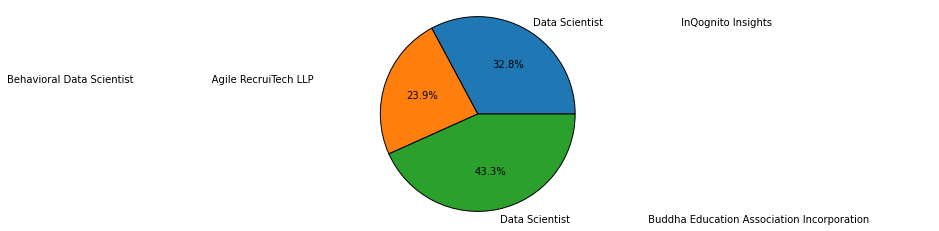

In [44]:
plt.pie(DS['Avg_Salary'],labels=DS['Jobs'],autopct='%1.1f%%',wedgeprops={'edgecolor':'k'})
plt.axis('equal')
plt.show()

Data Analyst Jobs

In [45]:
DA=Df2[Df2.Jobs.str.contains('Analyst',case=False)]

In [46]:
DA

,Jobs,Experience,Min_Salary,Max_Salary,Avg_Salary
0,Data Analyst Operations ...,02,3.0,4.0,3.00
1,Analyst Business Operations ...,02,3.0,4.0,3.50
5,Associate Business Analyst ...,02,3.6,4.8,4.20
6,Data Analyst Simplisat...,05,10.0,15.0,12.50
9,Business Analyst Trainee ...,02,3.0,4.0,3.50
10,Business Analyst Non IT ...,02,3.0,4.0,3.50
12,Data Analyst Girl Powe...,05,3.8,5.2,4.50
13,Product Data Analyst A...,01,3.0,3.5,3.25
16,Data Analyst Imarticus...,02,3.0,4.0,3.50
17,MIS & Data Analyst Lad...,02,2.0,3.0,2.50


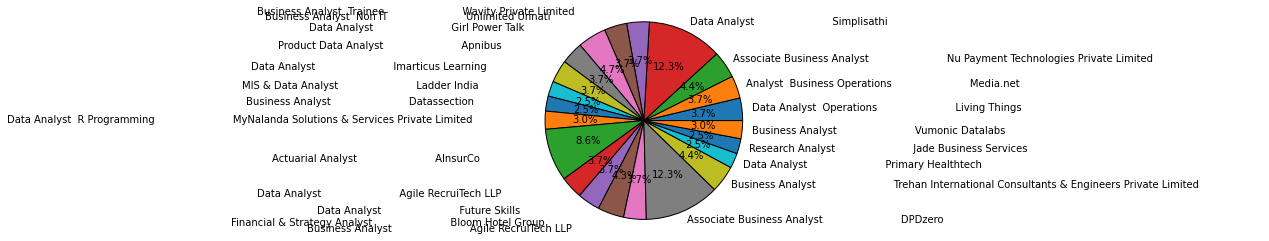

In [47]:
plt.pie(DA['Min_Salary'],labels=DA['Jobs'],autopct='%1.1f%%',wedgeprops={'edgecolor':'k'})
plt.axis('equal')
plt.show()

ML Jobs

In [48]:
ML=Df2[Df2.Jobs.str.contains('Engineer',case=False)]

In [49]:
ML

,Jobs,Experience,Min_Salary,Max_Salary,Avg_Salary
7,Senior Python AI/ML Engineer ...,05,3.6,5.4,4.50
31,Data Quality Engineer ...,02,3.0,3.1,3.05
33,Business Analyst Treha...,02,3.6,4.8,4.20


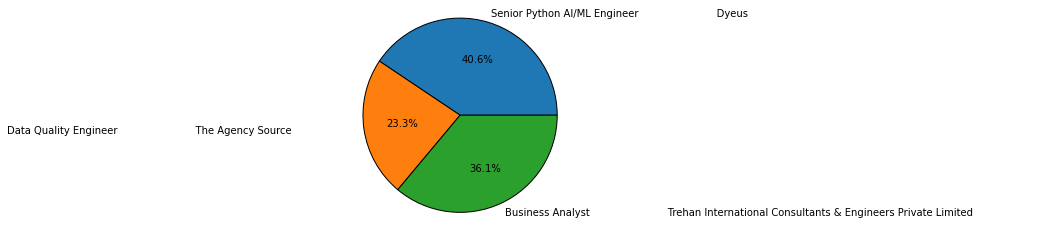

In [50]:
plt.pie(ML['Max_Salary'],labels=ML['Jobs'],autopct='%1.1f%%',wedgeprops={'edgecolor':'k'})
plt.axis('equal')
plt.show()

Machine Learning Model

In [51]:
Df3=Df2

In [52]:
Df3

,Jobs,Experience,Min_Salary,Max_Salary,Avg_Salary
0,Data Analyst Operations ...,02,3.0,4.0,3.00
1,Analyst Business Operations ...,02,3.0,4.0,3.50
2,Data Science Technical Trainer ...,05,2.0,5.0,3.50
3,Data Entry Specialist ...,02,2.0,3.0,2.50
4,Data Scientist InQogni...,05,5.0,6.0,5.50
5,Associate Business Analyst ...,02,3.6,4.8,4.20
6,Data Analyst Simplisat...,05,10.0,15.0,12.50
7,Senior Python AI/ML Engineer ...,05,3.6,5.4,4.50
8,Technical Trainer EdSl...,05,5.0,8.0,6.50
9,Business Analyst Trainee ...,02,3.0,4.0,3.50


In [53]:
Df3.dtypes

Jobs           object
Experience     object
Min_Salary    float64
Max_Salary    float64
Avg_Salary    float64
dtype: object

In [54]:
x=Df3[['Experience']]
y=Df3['Avg_Salary']

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [57]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [58]:
y_predict=model.predict(x_test)

In [59]:
y_predict

array([3.13113208, 3.13113208, 6.73537736, 6.73537736, 6.73537736,
       6.73537736, 3.13113208, 6.73537736])

In [60]:
from sklearn.metrics import r2_score
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: -0.5170023807404758


In [61]:
from sklearn import metrics
r_square=metrics.r2_score(y_test,y_predict)
print('R-Square Error:',r_square)

R-Square Error: -0.5170023807404758
